### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

# for removing common words
from nltk.corpus import stopwords

# for word stemming
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud, ImageColorGenerator
from os import path
from PIL import Image
import matplotlib.font_manager

### Loading Data & Performing EDA

In [2]:
df = pd.read_csv('fake_job_postings.csv')

In [3]:
print(df.shape)

(17880, 18)


In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
17875    False
17876    False
17877    False
17878    False
17879    False
Length: 17880, dtype: bool


In [8]:
df.duplicated().sum()

0

### Categorizing Data into Categorical Columns and Numerical Columns

In [9]:
 object_columns_df = df.select_dtypes(include='object')

In [10]:
 object_columns_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [11]:
int_columns_df = df.select_dtypes(include='int')
int_columns_df.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,1,0,0
1,2,0,1,0,0
2,3,0,1,0,0
3,4,0,1,0,0
4,5,0,1,1,0


### Making Dataframes for real job posting and fake job posting
Fake and real job posting is indicated from the Fraudulent column of the dataset. It has integer values 0 and 1.

If the job post is real then the Fraudulent column value will be 0
If the job post is fake then the Fraudulent column value will be 1


In [12]:
fake = df[df['fraudulent'] == 1]

In [13]:
fake.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [14]:
fake.shape

(866, 18)

In [15]:
# Around 866 job posts in our dataset are fake, now let's calculate real job post
real = df[df['fraudulent'] == 0]
real.shape

(17014, 18)

### Data Cleaning

In [16]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [17]:
df.fillna("N/A", inplace=True)

In [18]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

### Data Visualization

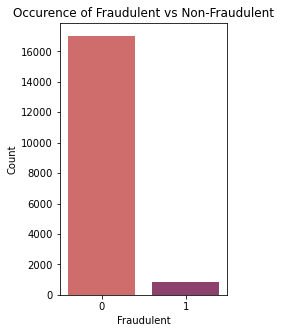

In [19]:
# Count the number of unique values in the 'fraudulent' column
fraudulent_counts = df['fraudulent'].value_counts()

# Plot the counts using a rainbow color palette
plt.figure(figsize=(3, 5))
sns.barplot(x=fraudulent_counts.index, y=fraudulent_counts.values, palette='flare')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.title('Occurence of Fraudulent vs Non-Fraudulent')
plt.show()

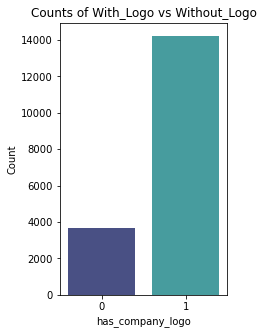

In [20]:
# Count the number of unique values in the 'has_company_logo' column
has_company_logo_counts = df['has_company_logo'].value_counts()

# Plot the data
plt.figure(figsize=(3, 5))
sns.barplot(x=has_company_logo_counts.index, y=has_company_logo_counts.values, palette = "mako")
plt.xlabel('has_company_logo')
plt.ylabel('Count')
plt.title('Counts of With_Logo vs Without_Logo')
plt.show()

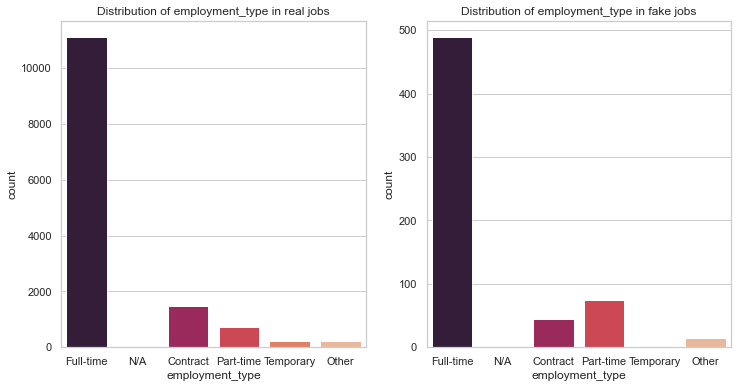

In [21]:
# visualization of distribution of employment_type
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  # Set the figure size to accommodate both plots side by side

# Create the first subplot for the distribution of employment_type
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot position 1
sns.countplot(x='employment_type', data=real, palette="rocket", order=df['employment_type'].value_counts().index)
plt.title('Distribution of employment_type in real jobs')

# Create the second subplot for the distribution of employment_type in fake jobs
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot position 2
sns.countplot(x='employment_type', data=fake, palette="rocket", order=df['employment_type'].value_counts().index)
plt.title('Distribution of employment_type in fake jobs')

plt.show()

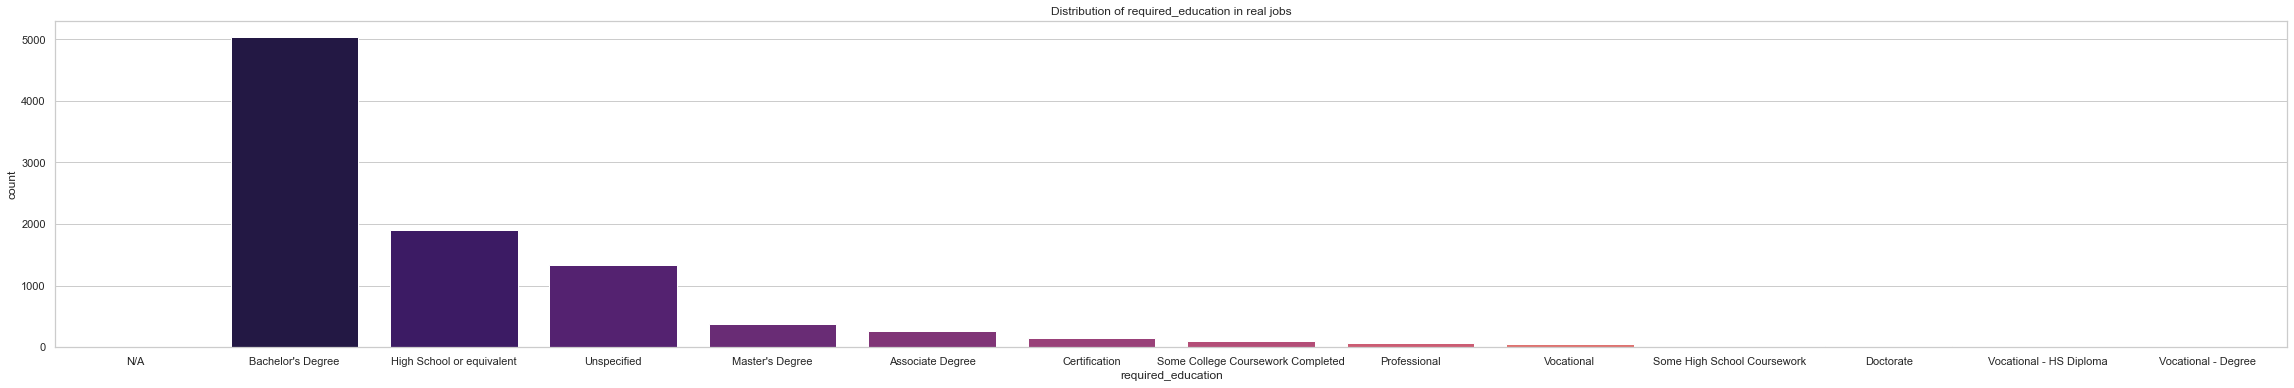

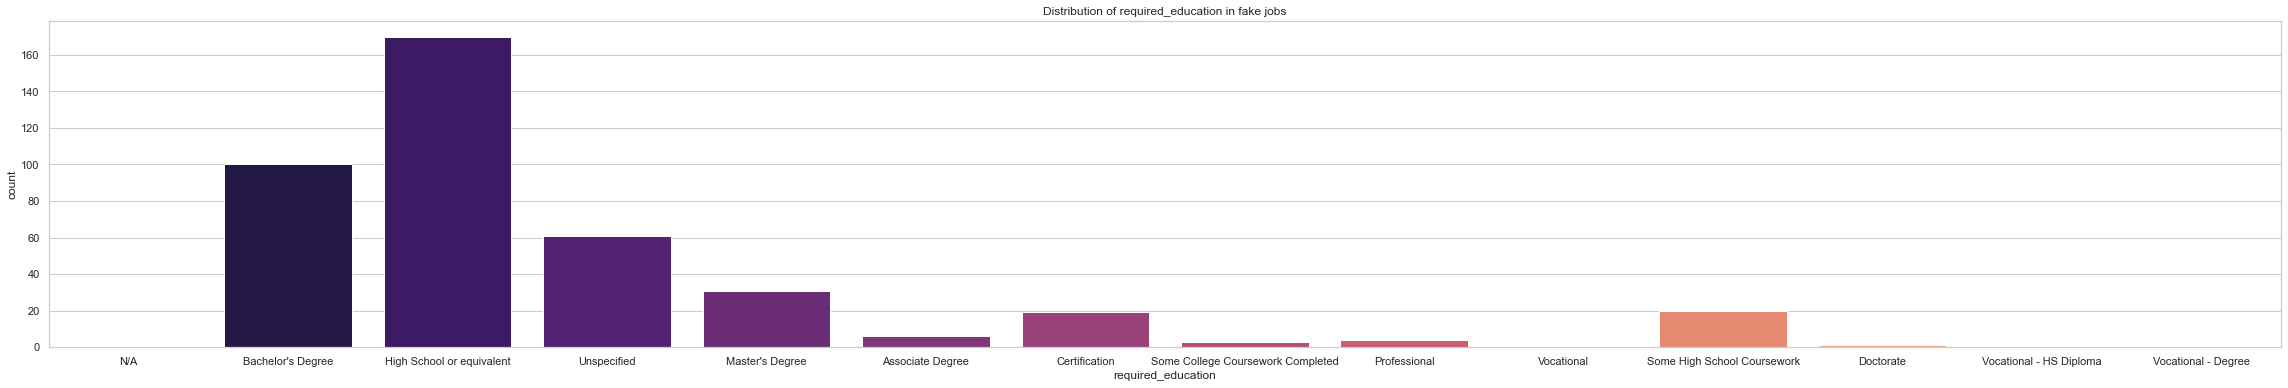

In [22]:
# visualization of distribution of required education
sns.set(style="whitegrid")
plt.figure(figsize=(40, 6))  # Set the figure size to accommodate both plots side by side

# Create the first subplot for the distribution of employment_type

sns.countplot(x='required_education', data=real, palette="magma", order=df['required_education'].value_counts().index)
plt.title('Distribution of required_education in real jobs')
plt.show()
# Create the second subplot for the distribution of required education in fake jobs
sns.set(style="whitegrid")
plt.figure(figsize=(40, 6))

sns.countplot(x='required_education', data=fake, palette="magma", order=df['required_education'].value_counts().index)
plt.title('Distribution of required_education in fake jobs')

plt.show()

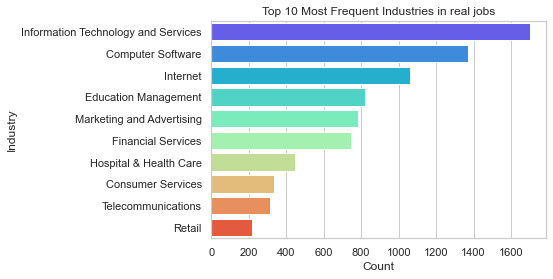

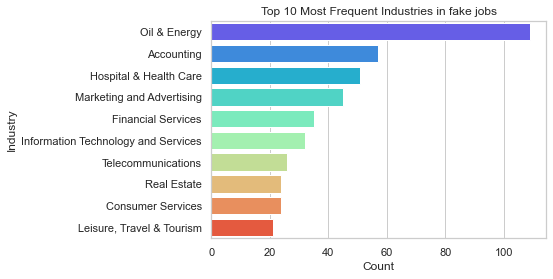

In [23]:
# Count the occurrences of unique values in the 'industry' column in real jobs
industry_counts = real['industry'].value_counts()

# Select the top 10 most frequent occurrences
top_10_industry = industry_counts.head(10)

# Plot the top 10 most frequent occurrences
sns.barplot(y=top_10_industry.index, x=top_10_industry.values, palette='rainbow')
plt.ylabel('Industry')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Industries in real jobs')
plt.show()

# Count the occurrences of unique values in the 'industry' column in fake jobs
industry_counts = fake['industry'].value_counts()

# Select the top 20 most frequent occurrences
top_10_industry = industry_counts.head(10)

# Plot the top 10 most frequent occurrences

sns.barplot(y=top_10_industry.index, x=top_10_industry.values, palette='rainbow')
plt.ylabel('Industry')
plt.xlabel('Count')
plt.title('Top 10 Most Frequent Industries in fake jobs')
plt.show()

In [24]:
# Let's combine job posts in one column
columns_to_concat = ['title', 'location', 'department', 'salary_range', 'company_profile',
                     'description', 'requirements', 'benefits', 'employment_type',
                     'required_experience', 'required_education', 'industry', 'function']

# Concatenate the values of specified columns into a new column 'job_posting'
df['job_posting'] = df[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Create a new DataFrame with columns 'job_posting' and 'fraudulent'
new_df = df[['job_posting', 'fraudulent']].copy()

In [25]:
new_df.head(15)

,job_posting,fraudulent
0,"Marketing Intern US, NY, New York Marketing N/...",0
1,"Customer Service - Cloud Video Production NZ, ...",0
2,"Commissioning Machinery Assistant (CMA) US, IA...",0
3,"Account Executive - Washington DC US, DC, Wash...",0
4,"Bill Review Manager US, FL, Fort Worth N/A N/A...",0
5,"Accounting Clerk US, MD, N/A N/A N/A Job Over...",0
6,"Head of Content (m/f) DE, BE, Berlin ANDROIDPI...",0
7,"Lead Guest Service Specialist US, CA, San F...",0
8,"HP BSM SME US, FL, Pensacola N/A N/A Solutions...",0
9,"Customer Service Associate - Part Time US, AZ...",0


In [34]:
# As we have seen in the output above that there's random text in the job_posting column, let's clean this data
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove digits
    text = re.sub(r'\d', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    text = ' '.join(words)

    return text

# Apply the combined function to the 'job_posting' column
new_df['job_posting'] = new_df['job_posting'].apply(preprocess_text)

In [35]:
new_df.head(10)

,job_posting,fraudulent
0,marketing intern us ny new york marketing na f...,0
1,customer service cloud video production nz auc...,0
2,commissioning machinery assistant cma us ia we...,0
3,account executive washington dc us dc washingt...,0
4,bill review manager us fl fort worth na na spo...,0
5,accounting clerk us md na na na job overviewap...,0
6,head content mf de berlin androidpit founded f...,0
7,lead guest service specialist us ca san franci...,0
8,hp bsm sme us fl pensacola na na solutions wom...,0
9,customer service associate part time us az pho...,0


In [36]:
# Now we will create dataframes for fake job posting and real job posting

fake_jobs = new_df[new_df['fraudulent'] == 1]
real_jobs = new_df[new_df['fraudulent'] == 0]

print(fake_jobs.head())
print(real_jobs.head())

                                           job_posting  fraudulent
98   ice technician us stocton ca oil energy staffi...           1
144  forward cap na na na na group raised fund purc...           1
173  technician instrument controls us power plant ...           1
180  sales executive pk sd karachi sales na na sale...           1
215  ice technician mt poso us ca bakersfield ca mt...           1
                                         job_posting  fraudulent
0  marketing intern us ny new york marketing na f...           0
1  customer service cloud video production nz auc...           0
2  commissioning machinery assistant cma us ia we...           0
3  account executive washington dc us dc washingt...           0
4  bill review manager us fl fort worth na na spo...           0


### Create a word cloud for real and fake job posting

In [37]:
# We are concatenating all job posts in a single string
text_Real = ' '.join(real_jobs['job_posting'])
text_Real[:500]

'marketing intern us ny new york marketing na food weve created groundbreaking awardwinning cooking site support connect celebrate home cooks give everything need one placewe top editorial business engineering team focused using technology find new better ways connect people around specific food interests offer superb highly curated information food cooking attract talented home cooks contributors country also publish wellknown professionals like mario batali gwyneth paltrow danny meyer partnersh'

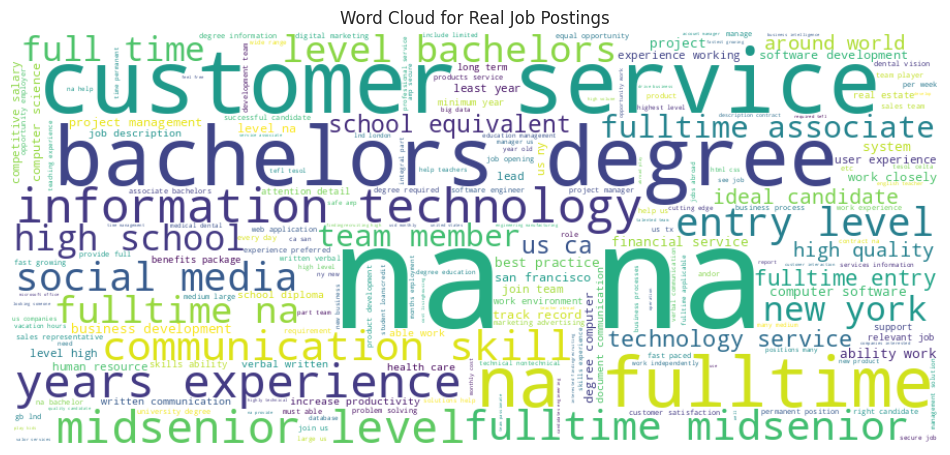

In [39]:
# Create a WordCloud object
wordcloud = WordCloud(width=900, height=400, background_color='white').generate(text_Real)

# Display the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real Job Postings')
plt.show()

In [40]:
# We are concatenating all job posts in a single string
text_Fake = ' '.join(fake_jobs['job_posting'])
text_Fake[:500]

'ice technician us stocton ca oil energy staffing amp recruiting done right oil amp energy industryrepresented candidates automatically granted following perks expert negotiations behalf maximizing compensation package implimenting ongoing increases significant signing bonus refined resources addition potential signing bonuses client companies offer year access anyperk significant corporate discounts cell phones event tickets house cleaning everything inbetween youll save thousands daily expendit'

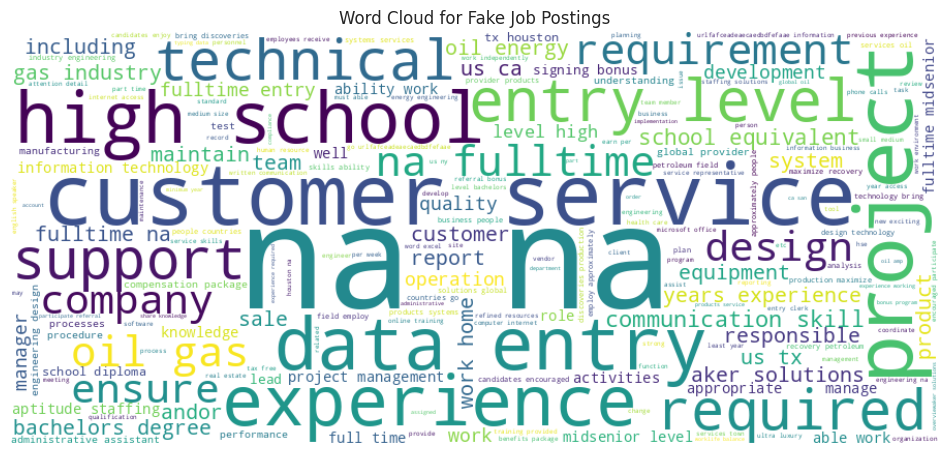

In [42]:
# Create a WordCloud object
wordcloud = WordCloud(width=900, height=400, background_color='white').generate(text_Fake)

# Display the WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake Job Postings')
plt.show()